In [11]:
# load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# reading the dataset file using pandas
insurance_data=pd.read_csv("insurance_data.csv")
employee_data=pd.read_csv("employee_data.csv")
vendor_data=pd.read_csv("vendor_data.csv")

In [13]:
# shows number of rows and columns in the dataset
insurance_data.shape

(10000, 38)

In [14]:
employee_data.shape

(1200, 10)

In [15]:
vendor_data.shape

(600, 7)

In [16]:
# information about dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TXN_DATE_TIME             10000 non-null  object 
 1   TRANSACTION_ID            10000 non-null  object 
 2   CUSTOMER_ID               10000 non-null  object 
 3   POLICY_NUMBER             10000 non-null  object 
 4   POLICY_EFF_DT             10000 non-null  object 
 5   LOSS_DT                   10000 non-null  object 
 6   REPORT_DT                 10000 non-null  object 
 7   INSURANCE_TYPE            10000 non-null  object 
 8   PREMIUM_AMOUNT            10000 non-null  float64
 9   CLAIM_AMOUNT              10000 non-null  int64  
 10  CUSTOMER_NAME             10000 non-null  object 
 11  ADDRESS_LINE1             10000 non-null  object 
 12  ADDRESS_LINE2             1495 non-null   object 
 13  CITY                      9946 non-null   object 
 14  STATE  

In [17]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AGENT_ID            1200 non-null   object
 1   AGENT_NAME          1200 non-null   object
 2   DATE_OF_JOINING     1200 non-null   object
 3   ADDRESS_LINE1       1200 non-null   object
 4   ADDRESS_LINE2       179 non-null    object
 5   CITY                1193 non-null   object
 6   STATE               1200 non-null   object
 7   POSTAL_CODE         1200 non-null   int64 
 8   EMP_ROUTING_NUMBER  1200 non-null   int64 
 9   EMP_ACCT_NUMBER     1200 non-null   object
dtypes: int64(2), object(8)
memory usage: 93.9+ KB


In [18]:
vendor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   VENDOR_ID      600 non-null    object
 1   VENDOR_NAME    600 non-null    object
 2   ADDRESS_LINE1  600 non-null    object
 3   ADDRESS_LINE2  97 non-null     object
 4   CITY           594 non-null    object
 5   STATE          600 non-null    object
 6   POSTAL_CODE    600 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 32.9+ KB


# Task 1

**Merge the 3 dataset and create 1 view of data.
You can merge insurance_data.csv and employee_data.csv on
AGENT_ID You can merge insurance_data.csv and vendor_data.csv on
VENDOR_ID Note: Use left Outer join as not all claims require Vendor**

In [19]:
# Merging dataframes with appropriate suffixes for future reference
view=pd.merge(insurance_data,employee_data,on='AGENT_ID',how='left',suffixes=('_CUSTOMER','_AGENT'))
data=pd.merge(view,vendor_data,on='VENDOR_ID',how='left')
data

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,...,STATE_AGENT,POSTAL_CODE_AGENT,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER,VENDOR_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE
0,2020-06-01 00:00:00,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,9000,...,TN,37217,35441155,LRZO53254369804934,Ramsey Inc,3114 West 20th Court,NaN,Panama City,FL,32405.0
1,2020-06-01 00:00:00,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000,...,AZ,85301,44055451,XBYG14382904542874,"Morales, Campbell and Washington",42 West Louise Street,B,Fayetteville,AR,72701.0
2,2020-06-01 00:00:00,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,13000,...,AL,36105,55770246,WRXH14597428306333,Johnson Ltd,2619 North Quality Lane,#315,Fayetteville,AR,72703.0
3,2020-06-01 00:00:00,TXN00000004,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,Health,172.87,16000,...,OK,73071,87652976,YEPN16077902472499,Blackwell-Foster,3609 Meadow Drive,NaN,Nashville,TN,37215.0
4,2020-06-01 00:00:00,TXN00000005,A00008173,PLC00000204,2011-12-26,2020-05-17,2020-05-22,Travel,88.53,3000,...,MD,21061,76119019,HZBK86544578578547,Evans-Scott,4001 19th Place Northeast,NaN,Washington,DC,20018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2021-06-30 00:00:00,TXN00009996,A00006029,PLC00007245,2014-04-11,2021-06-25,2021-06-26,Motor,105.75,1000,...,AR,72703,35413882,LFOJ76068590051807,NaN,NaN,NaN,NaN,NaN,NaN
9996,2021-06-30 00:00:00,TXN00009997,A00003555,PLC00002590,2015-08-25,2021-06-12,2021-06-17,Life,64.59,67000,...,GA,31405,91206790,AHEF60771774635030,"Newton, Hodges and Henry",32512 Christine Drive,NaN,Union City,CA,94587.0
9997,2021-06-30 00:00:00,TXN00009998,A00004230,PLC00006613,2018-10-11,2021-06-18,2021-06-23,Health,183.50,8000,...,KY,40272,115241097,WREH18805592939657,Reese-Mckinney,20 Garfield Street,NaN,Needham,MA,2492.0
9998,2021-06-30 00:00:00,TXN00009999,A00006694,PLC00001781,2016-01-29,2021-06-16,2021-06-21,Motor,113.46,2000,...,AR,72703,13995380,AAZI21883736448048,"Harmon, Manning and Bradley",1823 Dinger Road,NaN,Annapolis,MD,21402.0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TXN_DATE_TIME             10000 non-null  object 
 1   TRANSACTION_ID            10000 non-null  object 
 2   CUSTOMER_ID               10000 non-null  object 
 3   POLICY_NUMBER             10000 non-null  object 
 4   POLICY_EFF_DT             10000 non-null  object 
 5   LOSS_DT                   10000 non-null  object 
 6   REPORT_DT                 10000 non-null  object 
 7   INSURANCE_TYPE            10000 non-null  object 
 8   PREMIUM_AMOUNT            10000 non-null  float64
 9   CLAIM_AMOUNT              10000 non-null  int64  
 10  CUSTOMER_NAME             10000 non-null  object 
 11  ADDRESS_LINE1_CUSTOMER    10000 non-null  object 
 12  ADDRESS_LINE2_CUSTOMER    1495 non-null   object 
 13  CITY_CUSTOMER             9946 non-null   object 
 14  STATE_C

# Task 2

**Business Leader wants to find Top 3 Insurance Type where we are getting
most insurance claims?**

In [21]:
insureance_name=insurance_data.INSURANCE_TYPE.value_counts().index
insureance_val=insurance_data.INSURANCE_TYPE.value_counts().values

Property    1692
Mobile      1692
Health      1690
Name: INSURANCE_TYPE, dtype: int64


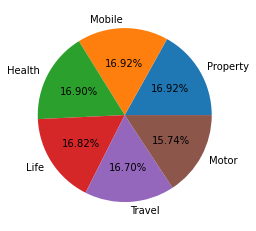

In [22]:
plt.pie(insureance_val, labels=insureance_name,autopct="%1.2f%%" )
print(insurance_data.INSURANCE_TYPE.value_counts()[:3])

**Top 3 Insurance Type where we are getting most insurance claims are,**

**Mobile with 1692 claims,**

**Property with 1692 claims,**

**Health with 1690 claims**

# Task 3

**Business Leader wants to find Top 5 States where we are getting most insurance claims
for customer belonging to HIGH(H) risk segment?**


In [23]:
insurance_data[insurance_data['RISK_SEGMENTATION']=='H'].STATE.value_counts()[:5]

CA    148
AZ    105
FL    104
TN    100
AR     97
Name: STATE, dtype: int64

Top 5 States where we are getting most insurance claims for customers belonging to HIGH(H) risk segment are,

CA

AZ

FL

TN

AR

# Task 4

**Business wants to create a new variable “COLOCATION” which will have following values IF
Customer State == Incident State == Agent Address State THEN 1 ELSE 0
Find the mean of this new column**

In [24]:
# The columns above in view with no suffixes represent column of vendor data.
data['COLOCATION'] = (data['STATE_CUSTOMER']==data['INCIDENT_STATE'])&(data['INCIDENT_STATE']==data['STATE_AGENT'])

In [25]:
# changing column vaues from True to 1 and False to 0
data['COLOCATION']=data.COLOCATION.astype('int')

In [26]:
data.COLOCATION.mean()

0.0044

**The mean of COLOCATION column is 0.0044**

# Task 5

**Data entry error was detected in the data and you are required to correct it. If for any
claim transaction “AUTHORITY_CONTACTED” is NOT “Police” and POLICE_AVAILABLE == 1
Then Update “AUTHORITY_CONTACTED” to Police.**


In [27]:
non_police = data[data['AUTHORITY_CONTACTED']!='Police']
update_rows = non_police[non_police['POLICE_REPORT_AVAILABLE']==1].index

In [28]:
# Updating the Authority column
data.loc[update_rows,'AUTHORITY_CONTACTED'] = 'Police'

In [29]:
# Checking
data[(data['POLICE_REPORT_AVAILABLE']==1)&(data['AUTHORITY_CONTACTED']!='Police')]

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,...,POSTAL_CODE_AGENT,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER,VENDOR_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,COLOCATION


# Task 6

**Business wants to check the Claim Amount for deviation for each transaction, they would
like you to calculate as follow
CLAIM_DEVIATION = AVG_CLAIM_AMOUNT_FOR_LAST_30DAYS (same insurance type)
/ CURRENT_CLAIM_AMOUNT
If the value < 0.5 THEN CLAIM_DEVIATION = 1 ELSE 0
If there is less than 30 days of transaction history THEN
-1 Note: LAST_30DAYS does not include current day**

In [30]:
data.TXN_DATE_TIME.max()

'2021-06-30 00:00:00'

In [31]:
curr_date = pd.to_datetime('2021-06-30')

In [32]:
data['TXN_DATE_TIME'] = pd.to_datetime(data['TXN_DATE_TIME'])

In [33]:
# data with last 30 days data
last_30 = data.loc[(data['TXN_DATE_TIME'] > '2021-05-30') & (data['TXN_DATE_TIME'] < '2021-06-30')]  

In [34]:
# Getting average claim of last 30 days insurance type wise and storing it in dictionary
average_claim = last_30.groupby('INSURANCE_TYPE').mean()['CLAIM_AMOUNT'].to_dict()

In [35]:
# defining a function for calculating claim_deviation
def Claim_deviation(row):
    if (curr_date - row['TXN_DATE_TIME'])<pd.Timedelta(days=30):
        return -1
    claim_deviation = average_claim[row['INSURANCE_TYPE']] / row['CLAIM_AMOUNT']
    if claim_deviation < 0.5:
        return 1
    else:
        return 0

In [36]:
# Applying the function to the dataframe
data['CLAIM_DEVIATION'] = data.apply(Claim_deviation,axis=1)

In [37]:
data.CLAIM_DEVIATION.value_counts()

 0    9216
-1     784
Name: CLAIM_DEVIATION, dtype: int64

**There are 9216 claims with deviation less than 0.5
784 claims with transaction history of less than 30 days**

# Task 7

**Find All Agents who have worked on more than 2 types of Insurance Claims. Sort them by
Total Claim Amount Approved under them in descending order**

In [38]:
# calculating insurance types worked on of each agent
type_count = data.groupby('AGENT_ID')['INSURANCE_TYPE'].nunique()

In [39]:
# Calculating wheather agent has more than 2 insurance types
agent_insurance_types = type_count>2

In [40]:
# getting list of agents who have worked on more than 2 types of insurance types
multi_type_agents = agent_insurance_types[agent_insurance_types].index

In [41]:
Top_agents = data.groupby(['AGENT_ID','AGENT_NAME']).sum().loc[multi_type_agents][['CLAIM_AMOUNT']].sort_values('CLAIM_AMOUNT',ascending=False)

In [42]:
Top_agents

,,CLAIM_AMOUNT
AGENT_ID,AGENT_NAME,
AGENT00807,Don Filkins,528800
AGENT00679,Clara Barnett,489000
AGENT00771,Roger Burns,422100
AGENT00125,Salvador Soriano,400400
AGENT00789,Alison Baron,392900
...,...,...
AGENT00910,Vincent Ragan,15500
AGENT00689,Connie Hunt,13700
AGENT00732,Sylvia Tran,11300


In [43]:
# Agents who have worked on more than 2 types of insurance claims, sorted by total claims approved under them in descending order along with types of insurance they worked in
Top_agents.join(type_count)

,,CLAIM_AMOUNT,INSURANCE_TYPE
AGENT_ID,AGENT_NAME,,
AGENT00807,Don Filkins,528800,6
AGENT00679,Clara Barnett,489000,4
AGENT00771,Roger Burns,422100,5
AGENT00125,Salvador Soriano,400400,4
AGENT00789,Alison Baron,392900,4
...,...,...,...
AGENT00910,Vincent Ragan,15500,3
AGENT00689,Connie Hunt,13700,3
AGENT00732,Sylvia Tran,11300,3


**The INSURANCE_TYPE column above represents count of types of insurance worked in.**

# Task 8

**Mobile & Travel Insurance premium are discounted by 10%
Health and Property Insurance premium are increased by 7%
Life and Motor Insurance premium are marginally increased by 2%
What will be overall change in % of the Premium Amount Collected for all these Customer?**

In [44]:
premium_collected_earlier = data['PREMIUM_AMOUNT'].sum()

In [45]:
# total premium collected by each insurance type
prem_by_types = data.groupby('INSURANCE_TYPE').sum()['PREMIUM_AMOUNT'].to_dict()

In [46]:
prem_by_types

{'Health': 252455.72999999966,
 'Life': 125621.21999999996,
 'Mobile': 15191.420000000016,
 'Motor': 165391.98000000013,
 'Property': 202285.83000000022,
 'Travel': 124139.77000000008}

In [47]:
# Mobile & Travel premium discounted by 10%
prem_by_types['Mobile']*=0.9
prem_by_types['Travel']*=0.9
# Health and Property premium increases by 7%
prem_by_types['Health']*=1.07
prem_by_types['Property']*=1.07
# Life and Motor premium increased by 2%
prem_by_types['Life']*=1.02
prem_by_types['Motor']*=1.02

In [48]:
# premium after discount and increase
revised_premium = sum(prem_by_types.values())

In [49]:
(revised_premium-premium_collected_earlier)*100/premium_collected_earlier

2.6798588543858517

In [50]:
premium_collected_earlier,revised_premium

(885085.95, 908805.0042000001)

**Overall change in Premium amount collected is approximately 2.68%**

# Task 9

**Business wants to give discount to customer who are loyal and under stress due to Covid**
**19. They have laid down an eligibility Criteria as follow
IF CUSTOMER_TENURE > 60 AND EMPLOYMENT_STATUS = “N”
AND NO_OF_FAMILY_MEMBERS >=4 THEN 1 ELSE 0
Create a new column “ELIGIBLE_FOR_DISCOUNT” and find it
mean.**

In [51]:
# calculating status for discount with given conditions
disc_status=(data['TENURE']>60)&(data['EMPLOYMENT_STATUS']=='N')&(data['NO_OF_FAMILY_MEMBERS']>=4)

In [52]:
# Creating an column ELIGIBLE_FOR_DISCOUNT with above values
data['ELIGIBLE_FOR_DISCOUNT'] = disc_status.astype('int')

In [53]:
# Mean of this column
data.ELIGIBLE_FOR_DISCOUNT.mean()

0.0299

**The mean is 0.0299, this means of total customers 2.99% are eligible for discount**

# Task 10

**Business wants to check Claim Velocity which is defined as follow
CLAIM_VELOCITY = NO_OF_CLAIMS_IN_LAST30DAYS (for the current insurance type)
/ NO_OF_CLAIMS_IN_LAST3DAYS (for the current insurance type)
Note: LAST30DAYS & LAST3DAYS does not include current
day**

In [54]:
curr_date

Timestamp('2021-06-30 00:00:00')

In [55]:
data['CLAIM_STATUS'].value_counts()

A    9497
D     503
Name: CLAIM_STATUS, dtype: int64

In [56]:
# we had defined last 30 days data in task#6 earlier, similarly defining for last 3 days
last_3_days = data.loc[(data['TXN_DATE_TIME'] > curr_date-pd.Timedelta(days=4)) & (data['TXN_DATE_TIME'] < curr_date)]

In [57]:
# Calculating total approved claims insurance type wise in last 30 days
claims_in_last_30_days = pd.DataFrame.from_dict(last_30[last_30['CLAIM_STATUS']=='A'].groupby('INSURANCE_TYPE').size().to_dict(),orient='index',columns=['NO_OF_CLAIMS_IN_LAST30DAYS'])

In [58]:
# Calculating total approved claims insurance type wise in last 3 days
claims_in_last_3_days = pd.DataFrame.from_dict(last_3_days[last_3_days['CLAIM_STATUS']=='A'].groupby('INSURANCE_TYPE').size().to_dict(),orient='index',columns=['NO_OF_CLAIMS_IN_LAST3DAYS'])

In [59]:
approved_claims = claims_in_last_30_days.join(claims_in_last_3_days)

In [60]:
approved_claims['CLAIM_VELOCITY'] = approved_claims['NO_OF_CLAIMS_IN_LAST30DAYS']/approved_claims['NO_OF_CLAIMS_IN_LAST3DAYS']

In [61]:
approved_claims

,NO_OF_CLAIMS_IN_LAST30DAYS,NO_OF_CLAIMS_IN_LAST3DAYS,CLAIM_VELOCITY
Health,128,14,9.142857
Life,128,12,10.666667
Mobile,127,9,14.111111
Motor,117,12,9.750000
Property,125,12,10.416667
Travel,123,14,8.785714


**claim velocity is calculated for only claims approved, similarly ot is calculated for all claims below.**

In [62]:
All_claims30D = pd.DataFrame.from_dict(last_30.groupby('INSURANCE_TYPE').size().to_dict(),orient='index',columns=['NO_OF_CLAIMS_IN_LAST30DAYS'])

In [63]:
All_claims3D = pd.DataFrame.from_dict(last_3_days.groupby('INSURANCE_TYPE').size().to_dict(),orient='index',columns=['NO_OF_CLAIMS_IN_LAST3DAYS'])

In [64]:
total_claims=All_claims30D.join(All_claims3D)

In [65]:
total_claims['CLAIM_VELOCITY'] = total_claims['NO_OF_CLAIMS_IN_LAST30DAYS']/total_claims['NO_OF_CLAIMS_IN_LAST3DAYS']

In [66]:
total_claims

,NO_OF_CLAIMS_IN_LAST30DAYS,NO_OF_CLAIMS_IN_LAST3DAYS,CLAIM_VELOCITY
Health,136,14,9.714286
Life,140,14,10.000000
Mobile,134,10,13.400000
Motor,122,13,9.384615
Property,129,13,9.923077
Travel,125,14,8.928571


# Task 11

**Find all low performing agents i.e. employees who are in the bottom 5 percentile based
on Claims worked by them.**


In [67]:
bottom_5percentile_limit = data.groupby('AGENT_ID').sum().quantile(0.05)['CLAIM_AMOUNT']

In [68]:
Agent_grouped_data = data.groupby('AGENT_ID').sum()

In [69]:
# Low performing agent data
low_performing_agents = Agent_grouped_data[Agent_grouped_data['CLAIM_AMOUNT']<=bottom_5percentile_limit][['CLAIM_AMOUNT']]

In [70]:
low_performing_agents

,CLAIM_AMOUNT
AGENT_ID,
AGENT00006,22400
AGENT00014,7400
AGENT00016,27000
AGENT00085,25700
AGENT00088,27700
AGENT00091,30000
AGENT00098,28200
AGENT00134,22000
AGENT00149,28900


# Task 12

**Business wants to find all Suspicious Employees (Agents).
IF TOTAL CLAIM AMOUNT which meet below criteria is >= 15000 THEN AGENT is classified
as Suspicious ELSE Not
CLAIM_STATUS = Approved AND CUSTOMER_RISK_SEGMENTATION = High
AND INCIDENT_SEVERITY = “Major Loss”
If Suspicious, then 1 ELSE 0. Find mean of this column**

In [71]:
criteria = (data['CLAIM_STATUS']=='A')&(data['RISK_SEGMENTATION']=='H')&(data['INCIDENT_SEVERITY']=='Major Loss')

In [72]:
# transactions that follow criteria
criteriamet = data[criteria]

In [73]:
grouped_suspicion_data = criteriamet.groupby('AGENT_ID').sum()

In [74]:
# storing agents_id that are suspicious(met all the criteria)
suspicious_agents = list(grouped_suspicion_data[grouped_suspicion_data['CLAIM_AMOUNT']>=15000].index)

In [75]:
employee_data

,AGENT_ID,AGENT_NAME,DATE_OF_JOINING,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER
0,AGENT00001,Ray Johns,1993-06-05,1402 Maggies Way,NaN,Waterbury Center,VT,5677,34584958,HKUN51252328472585
1,AGENT00002,Angelo Borjon,2005-12-27,414 Tanya Pass,NaN,Panama City,FL,32404,107363763,OPIS19290040088204
2,AGENT00003,Candy Spellman,2003-09-02,606 National Street,#306,Fayetteville,AR,72701,81744097,YSCJ67489688482590
3,AGENT00004,Mary Smith,2004-09-23,235 Hugh Thomas Drive,NaN,Panama City,FL,32404,67563771,ZANG21285355574581
4,AGENT00005,Mildred Diaz,2011-06-21,3426 Broadview Street,NaN,Montgomery,AL,36110,114951317,DZFS82244494451134
...,...,...,...,...,...,...,...,...,...,...
1195,AGENT01196,Myrtle Mccatty,2005-09-14,3553 Brandywine Street Northwest,NaN,Washington,DC,20008,32137938,EWBR19907574832501
1196,AGENT01197,John Dorsey,1993-12-04,2315 Chestnut Street,NaN,Montgomery,AL,36107,70796687,KGEJ74846009867837
1197,AGENT01198,Ruth Bigbee,1993-09-05,1983 Reidsville Street,NaN,Annapolis,MD,21401,124993912,RASV88064214164820
1198,AGENT01199,Tommie Camacho,2004-10-25,5821 Taft Street,NaN,Arvada,CO,80004,19424059,UOFO11656245339211


In [76]:
employee_data['SUSPICIOUS'] = 0

In [77]:
sus_emp_slice = employee_data['AGENT_ID'].isin(suspicious_agents)

In [78]:
# Changing suspicious column value to 1 of suspicious employees
employee_data.loc[sus_emp_slice,'SUSPICIOUS']=1

In [79]:
employee_data['SUSPICIOUS'].mean()

0.12416666666666666

**The mean of suspicious column is 0.124167 that means from all employees 12.42% are suspicious**